# Каскады Хаара

Будем распознавать автомобильные номера

In [7]:
import cv2
import matplotlib.pyplot as plt
import os

In [6]:
HAAR_PATH_XML = "haarcascade_russian_plate_number.xml"
DATA_PATH = "data/"

In [27]:
def haar(image_name, cascade_path, scale_factor=1.1, min_neighbors=5, min_size=(10, 10)):
  cascade = cv2.CascadeClassifier(cascade_path)
  img = cv2.imread(image_name)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  detected = cascade.detectMultiScale(gray, scaleFactor=scale_factor, minNeighbors=min_neighbors, minSize=min_size)

  for (x, y, w, h) in detected:
      cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
      
  return img


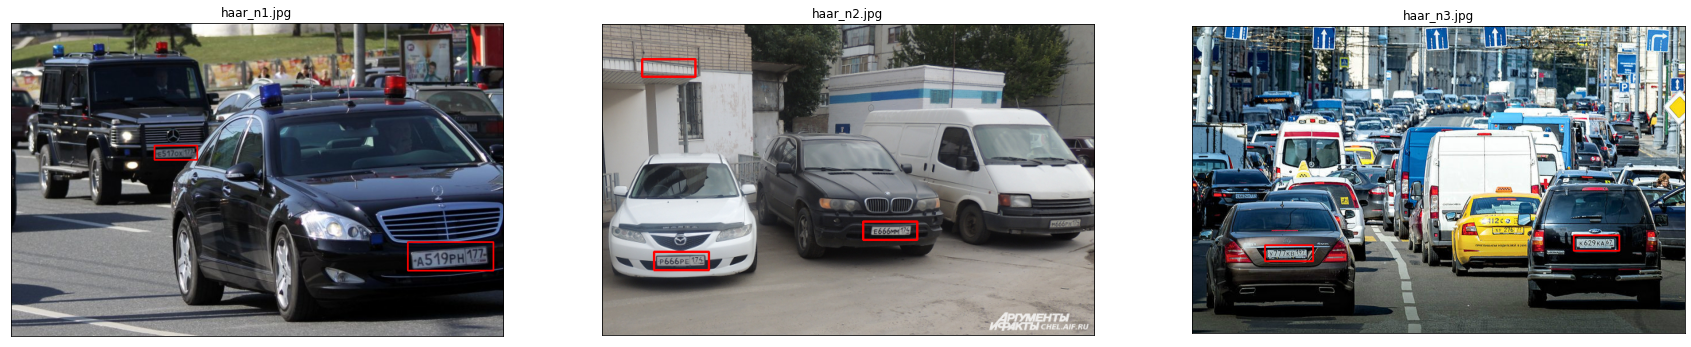

In [28]:
all_img = list(os.walk(DATA_PATH))[0][2]
fig, axs = plt.subplots(1, 3, figsize=(30, 30))

for i, (ax, img) in enumerate(zip(axs.ravel(), all_img)):
    res = haar(DATA_PATH + img, HAAR_PATH_XML)
    ax.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    ax.set_title("haar_" + img)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
